In this notebook, we compare the derivatives 
$$\frac{\partial P^g_\ell}{\partial \sigma_{\log M}}, \frac{\partial B^g_0}{\partial \sigma_{\log M}}$$ 
taken at the fiducial value $\sigma_{\log M} = 0.2{\rm dex}$ and at $\sigma_{\log M} = 0.55{\rm dex}$. The derivatives at $\sigma_{\log M} = 0.55{\rm dex}$ is calculated using the higher resolution $\sc{Quijote}$ simulations.

While the fiducial derivatives are calculated using 
$$(500{\rm sims})\times(3{\rm RSD})\times(5{\rm HOD~seeds})=7500{\rm mocks}$$ 
the higher resolution derivatives are calculated using 
$$(100{\rm sims})\times(3{\rm RSD})\times(5{\rm HOD~seeds})=1500{\rm mocks}$$

In [1]:
import os 
import h5py
import numpy as np 
# --- eMaNu --- 
from emanu import util as UT
# --- plotting --- 
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False

In [2]:
dir_dat = os.path.join(UT.doc_dir(), 'dat', 'hod') 

In [3]:
fp02k_fid = os.path.join(dir_dat, 'hod_dP02dtheta.sigma_logM.seed0to4.reg.dat')
dp02k_fid = np.loadtxt(fp02k_fid, skiprows=1, unpack=True, usecols=range(3))

fp02k_hir = os.path.join(dir_dat, 'hod_dP02dtheta.sigma_logM_HR.seed0to4.reg.dat')
dp02k_hir = np.loadtxt(fp02k_hir, skiprows=1, unpack=True, usecols=range(3))

In [4]:
n_k = int(len(dp02k_fid[0])/2)

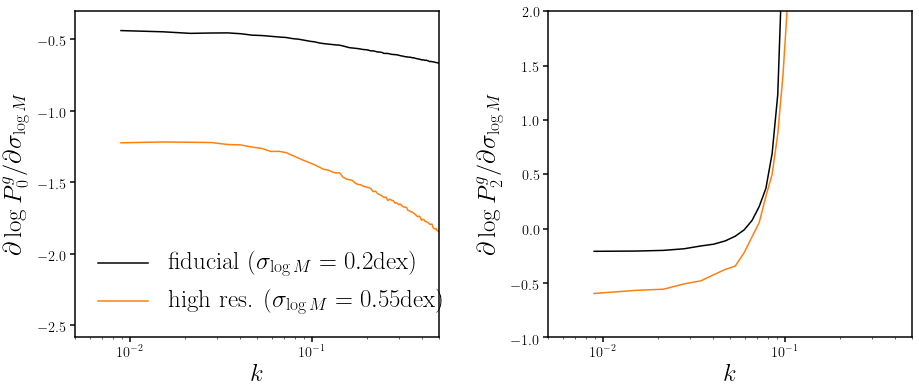

In [5]:
fig = plt.figure(figsize=(15,6))

# monopole
sub = fig.add_subplot(121)

sub.plot(dp02k_fid[0][:n_k], dp02k_fid[2][:n_k], c='k', label=r'fiducial ($\sigma_{\log M} = 0.2$dex)')
sub.plot(dp02k_hir[0][:n_k], dp02k_hir[2][:n_k], c='C1', label=r'high res. ($\sigma_{\log M} = 0.55$dex)')

sub.legend(loc='lower left', fontsize=25)
sub.set_xlabel(r'$k$', fontsize=25)
sub.set_xlim(5e-3, 0.5)
sub.set_xscale('log')

sub.set_ylabel('$\partial \log P^g_0/\partial \sigma_{\log M}$', fontsize=25)

# quadrupole
sub = fig.add_subplot(122)

sub.plot(dp02k_fid[0][n_k:], dp02k_fid[2][n_k:], c='k')
sub.plot(dp02k_hir[0][n_k:], dp02k_hir[2][n_k:], c='C1')

sub.set_xlabel(r'$k$', fontsize=25)
sub.set_xlim(5e-3, 0.5)
sub.set_xscale('log')
sub.set_ylabel('$\partial \log P^g_2/\partial \sigma_{\log M}$', fontsize=25)
sub.set_ylim(-1., 2.)

fig.subplots_adjust(wspace=0.3)

In [6]:
fbk_fid = os.path.join(dir_dat, 'hod_dBdtheta.sigma_logM.seed0to4.reg.dat')
dbk_fid = np.loadtxt(fbk_fid, skiprows=1, unpack=True, usecols=range(5))

fbk_hir = os.path.join(dir_dat, 'hod_dBdtheta.sigma_logM_HR.seed0to4.reg.dat')
dbk_hir = np.loadtxt(fbk_hir, skiprows=1, unpack=True, usecols=range(5))

In [7]:
kf = 2.*np.pi/1000. # fundmaentla mode

i_k, j_k, l_k = dbk_fid[0], dbk_fid[1], dbk_fid[2]
bklim = ((i_k*kf <= 0.5) & (j_k*kf <= 0.5) & (l_k*kf <= 0.5)) # k limit 

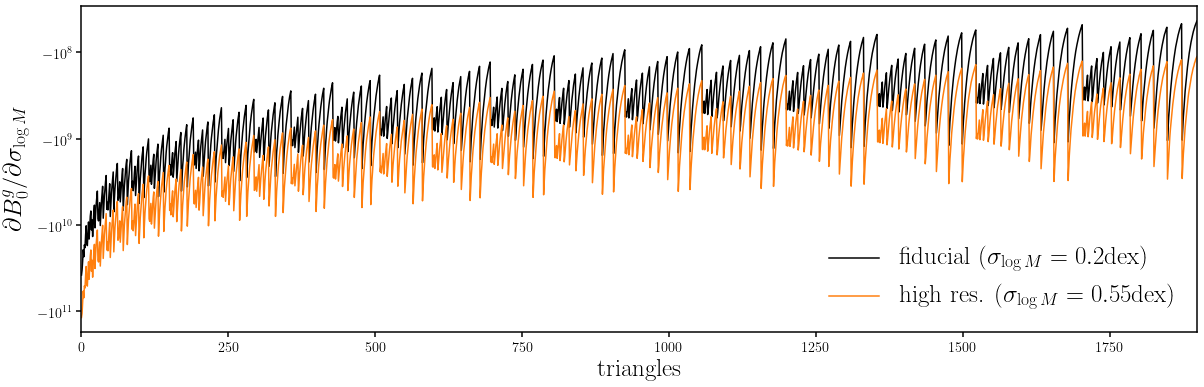

In [8]:
fig = plt.figure(figsize=(20,6))
sub = fig.add_subplot(111)

sub.plot(range(np.sum(bklim)), dbk_fid[-2][bklim], c='k', label=r'fiducial ($\sigma_{\log M} = 0.2$dex)')
sub.plot(range(np.sum(bklim)), dbk_hir[-2][bklim], c='C1', label=r'high res. ($\sigma_{\log M} = 0.55$dex)')

sub.legend(loc='lower right', fontsize=25)
sub.set_xlabel('triangles', fontsize=25)
sub.set_xlim(0, np.sum(bklim))
sub.set_ylabel('$\partial B^g_0/\partial \sigma_{\log M}$', fontsize=25)
sub.set_yscale('symlog')